## Desafio Oficina de aprendizado de máquinas da comunidade AI Girls

Grupo C: Ana Maria Bender, Klara Narumi e Larrissa Rocha

In [28]:
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from matplotlib import pyplot

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz 
from sklearn.metrics import r2_score # quanto mais proximo de 1 melhor o modelo
from sklearn.metrics import mean_absolute_error # desvio médio entre observado e predito.
from sklearn.metrics import mean_squared_error

from graphviz import render


In [29]:
# importar dados

df_modelo = pd.read_csv('df_modelo.csv')
df_modelo.head()
pd.set_option('display.max_columns', None)


# Modelo arvore de decisão

In [30]:
#define as caracteristicas para treinar o modelo

X = df_modelo.drop(['G3'], axis=1)
y = df_modelo['G3']

X_social=df_modelo[['activities','freetime','reason','romantic','goout','Dalc','Walc','G1','G2']]
X_family=df_modelo[['famsize','Pstatus','Medu','Fedu','Mjob','Fjob','guardian','famsup','nursery','famrel','G1','G2']]
X_demog=df_modelo[['school','sex','age','address','traveltime','studytime','internet','failures','absences','schoolsup','paid','health','higher','G1','G2']]
X_correlacao=df_modelo[['sex','Medu','Fedu','romantic','failures','G1','G2']]


In [31]:
print(X.shape)
print(y.shape)

(395, 32)
(395,)


## Vamos usar uma arvore de decisão aqui! 

Esse tipo de algoritmo é muito interessante, porque é fácil entender porque ele classificou uma amostra em um determinado valor. Isso porque ele funciona como se fosse feitas uma series de perguntas e então chega-se a uma conclusão.É uma estratégia conhecida como dividir para conquistar: um problema complexo é decomposto em sub-problemas mais simples e recursivamente esta técnica é aplicada a cada sub-problema 

Com esse tipo de algoritmo normalmente não precisamos escalar os dados, ele consegue lidar com dados que não são separados linearmente e a importância dos atributos é revelada e fácil de explicar

In [32]:
#cria uma função para treinar, testar e avaliar o modelo em uma unica chamadinha (contem grafico da árvore e grafico de importancia das características) <3

def arvore_test(X,y,max_depth):

## treino e teste
    X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)
    X_test.shape

# Fit regression model
    regr_1 = DecisionTreeRegressor(max_depth=max_depth)
    regr_1.fit(X_train, y_train)

# Predict
    y_pred = regr_1.predict(X_test)

# export the decision tree to a tree.dot file # for visualizing the plot easily anywhere #só ta salvando um pq sempre salva com o mesmo nome...
    export_graphviz(regr_1, out_file ='tree.dot')  
    render('dot', 'png', 'tree.dot')

# plot tree
    plt.figure(figsize=(10,10))  # set plot size (denoted in inches)
    tree.plot_tree(regr_1, fontsize=8)
    plt.show()

## Feature importance

    importance = regr_1.feature_importances_

# summarize feature importance
    for i,v in enumerate(importance):
        print('Feature: %0d, Score: %.5f' % (i,v))

    features_n = X.columns
    features_n

# plot feature importance
    pyplot.bar([x for x in range(len(importance))], importance)
    pyplot.xticks([x for x in range(len(importance))], features_n, rotation='vertical')
    pyplot.show()
         
## Evaluation
   
    print('r2 score: y_test and y_predito')  
    print(r2_score(y_test, y_pred))
        
    print('mean absolute error y_test e y_predito')
    print(mean_absolute_error(y_test, y_pred))
    
    print('mean squared error y_test e y_predito')
    print(mean_squared_error(y_test, y_pred))

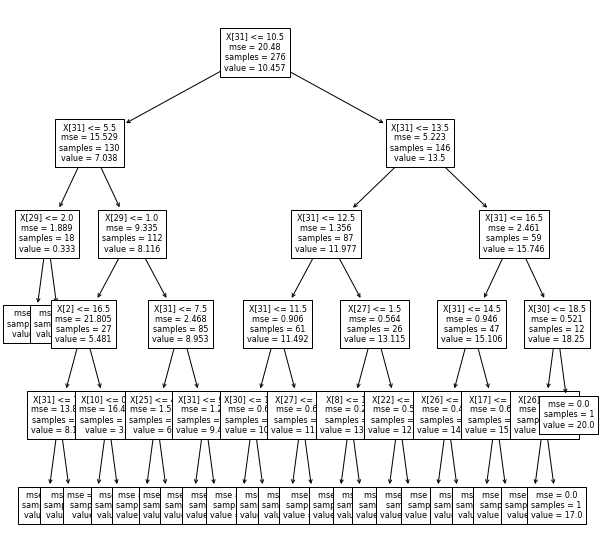

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.03321
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00035
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.02337
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00076
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00062
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00184
Feature: 26, Score: 0.00050
Feature: 27, Score: 0.00167
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.05212
Feature: 30, Score: 0.00149
Feature: 31, Score: 0.88406


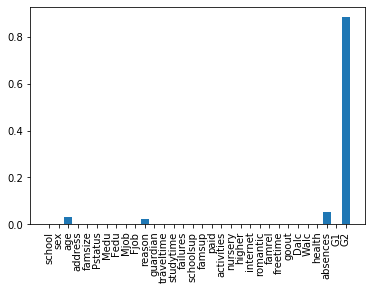

r2 score: y_test and y_predito
0.8585479635629735
mean absolute error y_test e y_predito
1.035869529753593
mean squared error y_test e y_predito
3.109407634941679


In [33]:
arvore_test(X,y,5)

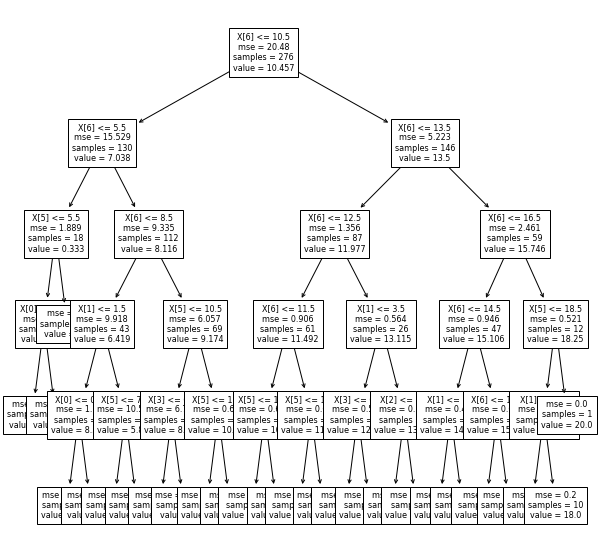

Feature: 0, Score: 0.00699
Feature: 1, Score: 0.01139
Feature: 2, Score: 0.00008
Feature: 3, Score: 0.00526
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01937
Feature: 6, Score: 0.95691


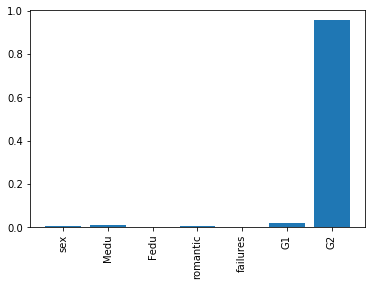

r2 score: y_test and y_predito
0.637822049960459
mean absolute error y_test e y_predito
1.6856161812044164
mean squared error y_test e y_predito
7.961418664777109


In [34]:
arvore_test(X_correlacao, y, 5)

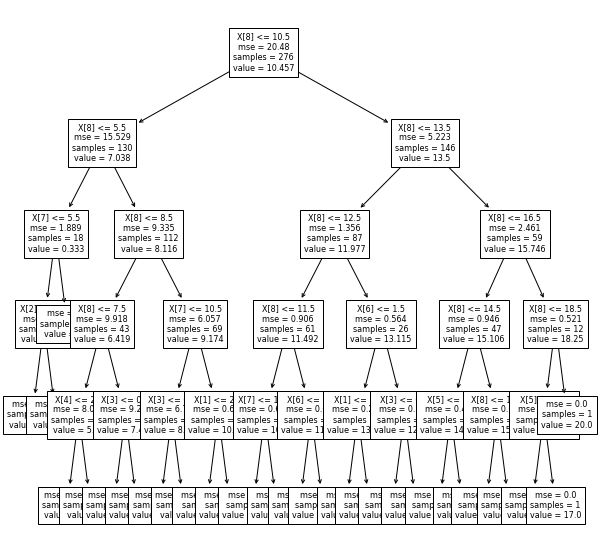

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00086
Feature: 2, Score: 0.00486
Feature: 3, Score: 0.01234
Feature: 4, Score: 0.01097
Feature: 5, Score: 0.00055
Feature: 6, Score: 0.00182
Feature: 7, Score: 0.00732
Feature: 8, Score: 0.96128


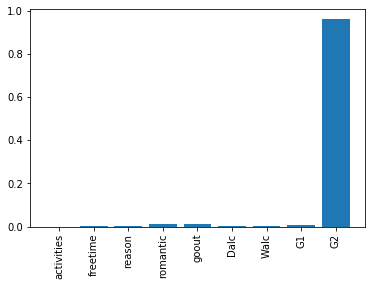

r2 score: y_test and y_predito
0.6876990937797367
mean absolute error y_test e y_predito
1.5599786068273465
mean squared error y_test e y_predito
6.865018324658805


In [35]:
arvore_test(X_social,y,5)

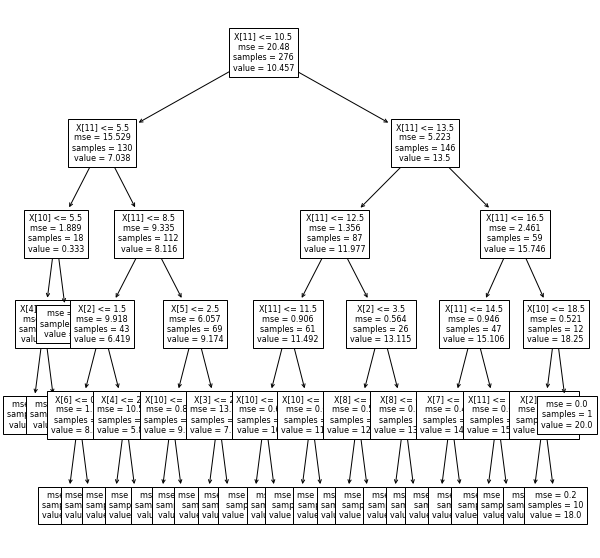

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.01099
Feature: 3, Score: 0.00837
Feature: 4, Score: 0.01559
Feature: 5, Score: 0.01716
Feature: 6, Score: 0.00135
Feature: 7, Score: 0.00020
Feature: 8, Score: 0.00031
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00614
Feature: 11, Score: 0.93989


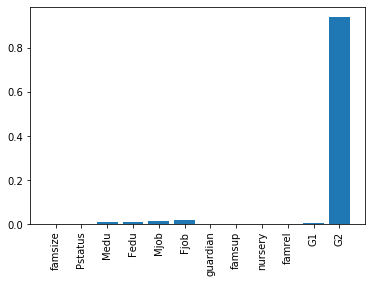

r2 score: y_test and y_predito
0.6245426566961761
mean absolute error y_test e y_predito
1.8622187453069807
mean squared error y_test e y_predito
8.253327129606717


In [36]:
arvore_test(X_family,y,5)

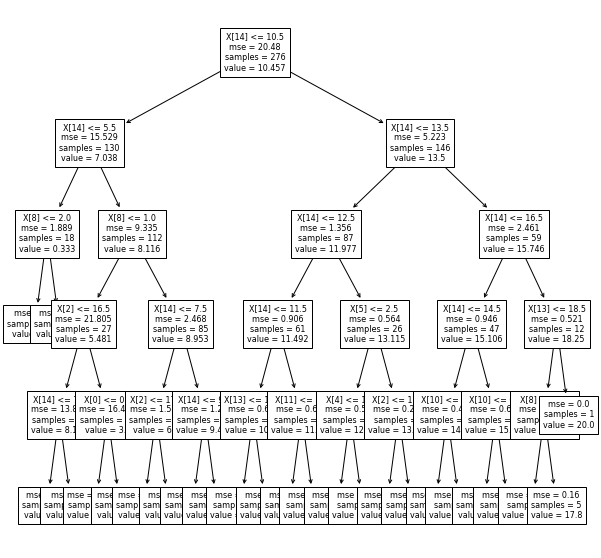

Feature: 0, Score: 0.01325
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.03516
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00029
Feature: 5, Score: 0.00037
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.05288
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00094
Feature: 11, Score: 0.00099
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00151
Feature: 14, Score: 0.89460


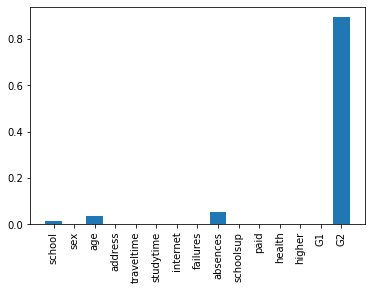

r2 score: y_test and y_predito
0.8444261985441189
mean absolute error y_test e y_predito
1.098796256388303
mean squared error y_test e y_predito
3.4198331690981085


In [37]:
arvore_test(X_demog,y,5)

# Avaliação do modelo

## Métricas de avaliação do modelo de regressão

Existem algumas estatísticas que podemos usar para avaliar se o nosso modelo fez um bom trabalho na previsão das notas finais, as mais comuns para modelos de regressão, e que usamos nesse projeto são:
- Erro Médio Absoluto / Mean Absolute Error (MAE):
Aqui é calculado o resíduo, ou seja, a diferença absoluta entre o valor predito e o valor real de cada ponto, e depois é tirada uma média desses valores. O MAE descreve a magnitude típica dos resíduos, é uma métrica bastante intuitiva e quanto maior seu valor, mais o nosso modelo está "errando".
- Erro Quadrado Médio / Mean Square Error (MSE):
É parecido com o MAE, porém eleva ao quadrado a diferença entre o valor predito e o verdadeiro, então aqui  diferenças menores têm menos importância, enquanto diferenças maiores recebem mais peso.
- R^2:
Também conhecido como coeficiente de determinação, ele fornece uma indicação da qualidade do ajuste e, portanto, uma medida de quão bem as amostras não vistas podem ser previstas pelo modelo, por meio da proporção da variância explicada. O melhor score possível é 1.

## Conclusões

* Notamos que os melhores resultados, foram utilizando todas as features da base de dados (X) e utilizando os dados demográficos (X_demog);
* Já o X_family, o X_social e o X_correlacao apesar de apresentarem MAE baixo, apresentam MSE alto. É esperado que o MSE seja maior do que o MAE, porém com o R^2 se afastando do valor ideal (1), nota-se que com essa seleção de características a performance do modelo cai;
* Uma possível causa dessa diferença entre os resultados gerados com cada conjunto de features é a quantidade de features, pois em X e X_demog temos mais características alimentando o modelo;
* Com relação à profundidade máxima da árvore de decisão, notamos que o valor ideal é 5. Valores menores ou maiores do que 5 fazem a performance do modelo cair.